<br/><br/>
<br/><br/>

<h1 align="center">
 Uczenie maszynowe II
</h1>

<br/><br/>
<br/><br/>
<br/><br/>
<br/><br/>

<h1 align="right">
Artur Kalinowski <br>
Uniwersytet Warszawski <br>
Wydział Fizyki <br>    
</h1>

# Cel przedmiotu:

* prezentacja standardowych architektur używanych w uczeniu maszynowym
* zaprogramowanie w uczestnikach sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym

<br></br>
<br></br>

# Forma przedmiotu: warsztaty
* nacisk położony na uzyskanienie sprawności w używaniu pakietów oprogramowania używanych w uczeniu maszynowym
* część mówiona przez wykładowcę przeplatana z samodzielnymi ćwiczeniami

# Plan warsztatów:

* przygotowanie środowiska i rozgrzewka z programowania w Pythonie i analizy danych
* przypomnienie podstawowych pojęć w uczeniu maszynowym
* sieci w pełni połączone
* sieci konwolucyjne
* autokodery
* transfer modeli (ang. transfer learning)
* atencja
* 8
* 9
* 10
* 11
* 12
* 13
* 14

# Zasady zaliczania:

* obecność obowiązkowa - 2 nieusprawiedliwione nieobecności dozwolone.
  [Lista obecności]() na Kampus2
* obowiązkowe prace domowe po każdych zajęciach
* zaliczenie na podstawie samodzielnie wykonanego Projektu.
    * Projekt musi być wykonany w postaci czytelnego notatnika Jupyter
    * pliki Projektu muszą byćzaładowane na czas do Kampus2
    * dane wejściowe muszą być dostępne przez WWW: ogólnodostępne dane, lub dane umieszczone na dysku Google
    * Projekt musi być wykonany zgodnie z harmonogramem:
        * **25.03.2024**: definicja Projektu i konsultacja jego wykonywalności 
        * **14.04.2024**: notatnik z wstępną obróbką danych
        * **31.05.2024**: notatnik finalną wersją rozwiązania

# Infrastruktura:

* **Google Colaboratory** - chmura obliczeniowa:
    * minimalny narzut związany z instalacją
    * wygodny dostęp przez WWW 
    * ograniczona ilośc zasobów
    * nie skaluje się do zaawansowanych zastosowań

<br></br>
<br></br>
 
* **własna maszyna** - kontener:
    * wymaga pewnego wysiłku przy konfiguracji
    * pozwala na użycie włąsnych zasobów obliczeniowych
    * łatwy do przeniesienia na inne maszyny
    * standardowa technologia używania w IT

# Przygotowanie środowiska -  Google Colaboratory

**Proszę:**

* skorzystać z [linku]() w Kampus2 i otworzyć ten notatnik w Colab
* uruchomić maszynę wirtualną
* wyświetlić zużycie zasobów maszyny wirtualnej:

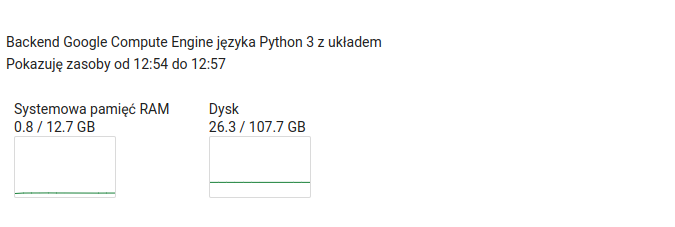

* zmienić typ środowiska wykonawczego na `GPU` i ponownie wyświetlić zużycie zasobów:

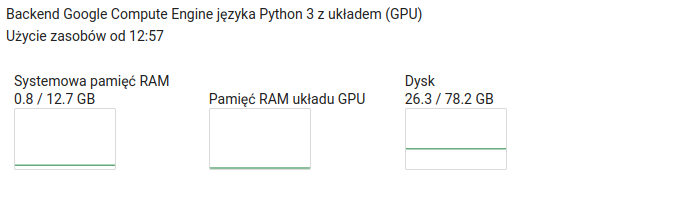

**Proszę**:

* zaimportować bibliotekę `tensorflow` pod nazwą `tf`
* wypisać na ekran:
    * wersję biblioteki zapisaną w polu `__version__`
    * wypisać liczbę dostępnych GPU:
      ```Python
      tf.config.list_physical_devices('GPU')
      ```
    * wypisać nazwę dostępnego GPU:
      ```Python
       tf.config.experimental.get_device_details(gpu_devices[0])
      ``` 

In [54]:
#BEGIN_SOLUTION
import tensorflow as tf
print("TF version:",tf.__version__)
print(tf.config.list_physical_devices('GPU'))

gpu_devices = tf.config.list_physical_devices('GPU')
if gpu_devices:
  details = tf.config.experimental.get_device_details(gpu_devices[0])
  print("GPU name:",details['device_name'])
#END_SOLUTION
pass

TF version: 2.13.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
GPU name: NVIDIA GeForce RTX 2070 SUPER


2023-09-19 16:13:47.097198: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


Korzystając z eksploratora plików w menu po lewej
**Proszę:**

* stworzyć katalog `data`
* pobrać [plik](https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv) w formacie CSV i załadować go do katalogu `dane` jako `rowery.csv`
* wczytać plik i wypisać pierwszą linię 

In [55]:
##BEGIN_SOLUTION
fileName = 'data/rowery.csv'
input_file = open(fileName, 'r')

for line in input_file:
    print(line)
    break
##END_SOLUTION
pass

 ,Armii Krajowej,Bora-Komorowskiego,Bulwary,Dworzec,Grzegórzecka,Kamieńskiego,Klimeckiego,Kopernika,Kotlarska,Mogilska,Monte Cassino,Niepołomska,Nowohucka,Smoleńsk,Tyniecka,Wadowicka,Wielicka,Średnia temp.,Min. temp.,Maks. temp.,Odczuwalna temp.,Opady (mm),Wiatr



**Proszę:**

* na swoim dysku Google utworzyć katalog `data`
* umieścić plik `rowery.csv` pobrany wcześniej na swoim dysku Google w katalogu `data`
* skonfigurować w Colab dostęp do dysku Google
* wczytać plik z dysku Google i wypisać pierwszą linię

In [56]:
##BEGIN_SOLUTION
from google.colab import drive
drive.mount('/content/drive')

with open('/content/drive/My Drive/data/rowery.csv', 'r') as input_file:
  for line in input_file:
    print(line)
    break
##END_SOLUTION
pass

ModuleNotFoundError: No module named 'google.colab'

**Proszę:**

* wczytać plik `data.csv` korzystając bezpośrednio z adresu URL:
  <br></br>
  ```
  https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv
  ```
  <br></br>
* proszę użyć funkcji `read_csv` pakietu `pandas`
* proszę wypisać na ekran informację o wczytanych danych używając metody describe:
  <br></br>
  ```Python
  print(df.describe())
  ```

In [ ]:
#BEGIN_SOLUTION
import pandas as pd

file_url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTWNYLoE3k3JegSt47hV66v5j7_Vh8jIdLRUhcMLrIAW4VcIZK-3W9rGoDSfnToUnCIb9DPngGAlgL6/pub?gid=0&single=true&output=csv'
df = pd.read_csv(file_url)
print(df.describe())

#END_SOLUTION
pass

# Przygotowanie środowiska -  kontener

Środowisko programistyczne: iterpreter Python i potrzebne biblioteki można instalować samodzielne na własnym komputerze.
dużo wygodniejszą opcją są kontenery - zestawy oprogramowania, włącznie z systemem operacyjnym, które można uruchomić na dowolnej maszynie
i uzyskać ściśle określone środowisko pracy.

1) instalacja programów do zarządzania kontenerami: [Docker](https://docs.docker.com/)
2) uruchomienie konkretnego kontenera

**Proszę:**

* osoby z laptopami z Windows: zainstalować aplikację [Docker Desktop](https://docs.docker.com/desktop/install/windows-install/)
* osoby z laptopami z Linuxem: zainstalować pakiet [Docker Engine](https://docs.docker.com/engine/install/)
* po instalacji proszę uruchomić testowy kontener `hello_world`
  
  (Windows - proszę otworzyć okno powłoki: `power shell`)

Oczekiwany wynik:

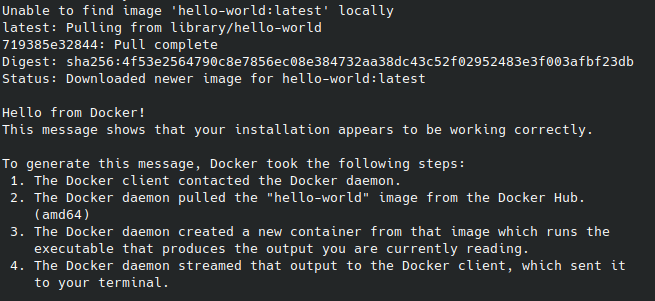

# Kontener przygotowany na zajęcia

Do wykładu został przygotowany kontener zawierający potrzebna pakiety Python oraz server Jupyter. 


**Proszę:**

* pobrać i uruchomić kontener [akalinow/ml_lecture](https://hub.docker.com/repository/docker/akalinow/ml_lecture/general)


Linux:

```
sudo docker run --name ml_lecture --rm -e DISPLAY=$DISPLAY  -v /home/$USER:/scratch -v /tmp/.X11-unix:/tmp/.X11-unix:ro  -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Windows:
```
docker pull akalinow/ml_lecture
docker run --name ml_lecture -v %WORKING_DIR%:/scratch -w /home/jupyter -p 8000:8000 akalinow/ml_lecture /home/jupyter/start-jupyter.sh
```

Oczekiwany wynik:

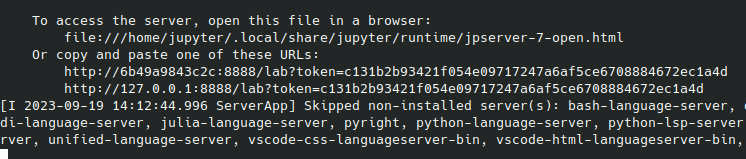

<br></br>
<br></br>
<br></br>

**Uwaga 1:** użycie GPU na lokalnym komputerze wymaga kilku dodatkowych kroków. Zainteresowane osoby proszę o kontakt.

**Uwaga 2:** na maszynach pod Linux polecam użycie [apptainer](https://apptainer.org/getting-started) zamiast Dockera. A apptainer można uruchamiać także kontyenery zbudowane z Dockrem


**Proszę:**

* otworzyć adres URL servera Jupyter ze swojej lokalnej maszyny
* pobrać notatnik z Colab
* uruchomić wszystkie komórki w notatniku na lokalnym komputerze

# Pakiety których będziemy używali w czasie zajęć:

* [numpy](https://numpy.org/) - podstawowa biblioteka do operacji numerycznych 
* [matplotlib](https://matplotlib.org/) - podstawowa bibltiotego do wizualizacji danych
* [seaborn](https://seaborn.pydata.org/) - biblioteka z dedykowanymi funkcjami do wizualizacji danych statystycznych
* [plotly](https://plotly.com/python/) - biblioteka z zaawansowanymi funkcjiami do wizualizacji, w szzcególności do tworzenie interaktywnych wizualizacji
* [pandas](https://pandas.pydata.org/) - Python Data Analysis Library
* [TensorFlow](https://www.tensorflow.org/) - framework do tworzenia i obsługi modelu uczenia maszynowego firmy Google 

# Numpy

**Proszę:**
* stworzyć i wypisać na ekran macierz numpy `x` o zawartości:
\begin{equation}
\begin{bmatrix}
1 & 2 & 1\\
5 & 5 & 4\\
0 & 1 & 2  
\end{bmatrix}
\end{equation}

* wypisać na ekran kształt tej macierzy:
  ```Python
  x.shape
  ```
* stworzyć macierz jednostkową  `y` o rzędzie macierzy `x`
  
* wypisać na ekran wynik działania operacji: $x+y,~~~ x \cdot y, ~~~ x*y$ 

**Proszę:**
* stworzyć macierz numpy `y` o zawartości:
$
\begin{bmatrix}
1 & 2 & 3
\end{bmatrix}
$

i kształcie `(1,3)`

* wypisać wynik działania: $x+y$

* wybrać z macierzy dwie pierwsze kolumny i wypisać wynik działania $x+y$

In [66]:
import numpy as np
from termcolor import colored

#BEGIN_SOLUTION
x = np.array([(1,2,1),(5,5,4), (0,1,2)])
print(colored("x:\n","blue"),x)
print(colored("The shape of x is:","blue"),x.shape,"\n")

y = np.identity(x.shape[0])
print(colored("y:\n","blue"),y,"\n")

#Most of the matrix operations are element-wise
print(colored("Result of x+y:\n","blue"),x+y,"\n")

#Ordinary mathematical matrix operations have to selected with proper method:
print(colored("Result of x dot y:\n","blue"),x.dot(y),"\n")

#Ordinary mathematical matrix operations have to selected with proper method:
print(colored("Result of x*y:\n","blue"),x*y,"\n")

#Matrices are extended (broadcasted) when dimensions do not allow for element wise operations.
#the broadcasting is performed if it is possible for given input matrices shape:
y = np.array([[1,2,3]])
print(colored("y maxtrix is:\n","blue"),y,"\n")
print(colored("Result of x*y:\n","blue"),x*y,"\n")

#Select first two columns of the y matrix:
y = y[:,0:2]
print(colored("x maxtrix is:\n","blue"),x,"\n")
print(colored("y maxtrix is:\n","blue"),y,"\n")

print(colored("Result of x*y:\'n","blue"),x*y)
#END_SOLUTION
pass

x:
 [[1 2 1]
 [5 5 4]
 [0 1 2]]
The shape of x is: (3, 3) 

y:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

Result of x+y:
 [[2. 2. 1.]
 [5. 6. 4.]
 [0. 1. 3.]] 

Result of x dot y:
 [[1. 2. 1.]
 [5. 5. 4.]
 [0. 1. 2.]] 

Result of x*y:
 [[1. 0. 0.]
 [0. 5. 0.]
 [0. 0. 2.]] 

y maxtrix is:
 [[1 2 3]] 

Result of x*y:
 [[ 1  4  3]
 [ 5 10 12]
 [ 0  2  6]] 

x maxtrix is:
 [[1 2 1]
 [5 5 4]
 [0 1 2]] 

y maxtrix is:
 [[1 2]] 



ValueError: operands could not be broadcast together with shapes (3,3) (1,2) 